In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import math
from helper import preprocess_data

def readData(filename) :
    data = pd.read_csv(filename, skipinitialspace=True,header=None)
    return [d for d in data.itertuples(index=False, name=None)]

In [7]:
data_cat= readData("hw4_cat.txt")
mtx_cat = np.reshape(data_cat, (64,500))

data_grass = readData("hw4_grass.txt")
mtx_grass = np.reshape(data_grass, (64,500))

T = np.concatenate((mtx_cat,mtx_grass),axis=1)
T = np.matrix(T)

Y = plt.imread("cat_grass.png")
Y = preprocess_data(Y)
Y = np.matrix(Y)


AxesImage(54,36;334.8x217.44)


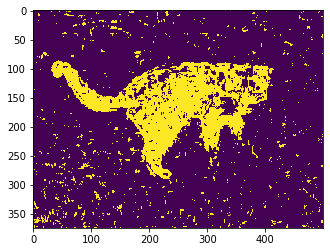

In [52]:
output = []
for i in range(187500):
    yk = Y[:,i]
    yk = np.reshape(yk,(len(yk),1))
    yk = np.matrix(yk)
    
    D = T - yk
    D2 = np.power(D, 2)
    dists = np.sum(D2, 0)
    sorted_dists = np.argsort(dists)
    
    cat = 0
    grass = 0
    for k in range(0,5):
        if sorted_dists[:,k] <= 500:
            cat = cat + 1
        else:
            grass = grass + 1
        k = k + 1
        
    if cat > grass:
        output.append(1)
    else:
        output.append(0)
        
output = np.reshape(output,(375,500))
print(plt.imshow(output))
plt.imsave("hw4_02.png", output, format = "png")    
    